In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from skimage import exposure

import scipy.misc
from scipy import ndimage
from skimage import filters

In [ ]:
image = color.rgb2gray(io.imread("xray.png"))
image = (image - np.min(image)) / (np.max(image) - np.min(image))

0.0


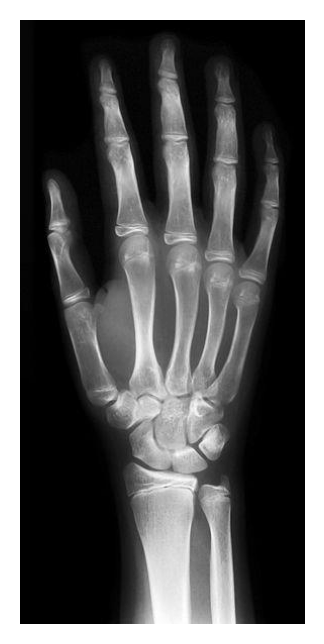

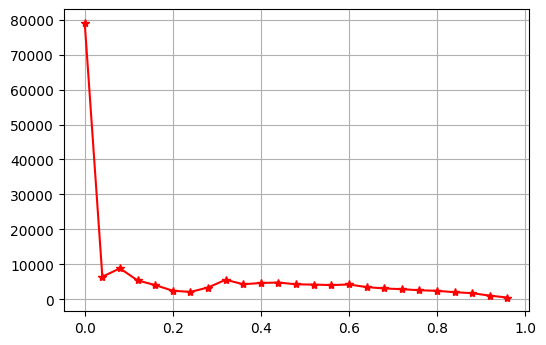

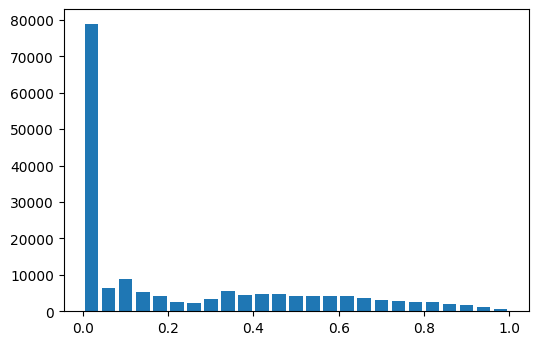

In [ ]:
no_bins = 25
np_histogram, bins = np.histogram(image, bins=no_bins)

#print(bins)
#print(bins.shape)
#print(np_histogram.shape)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=100)
plt.plot(bins[:-1], np_histogram, "r*-")
plt.grid(True)

plt.figure(dpi=100)
print(bins[0])
wid = 0.8 * bins[1] #bins[0]=0 
x = (bins[:-1] + bins[1:]) / 2
plt.bar(x, np_histogram , width=wid)
plt.show()



[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


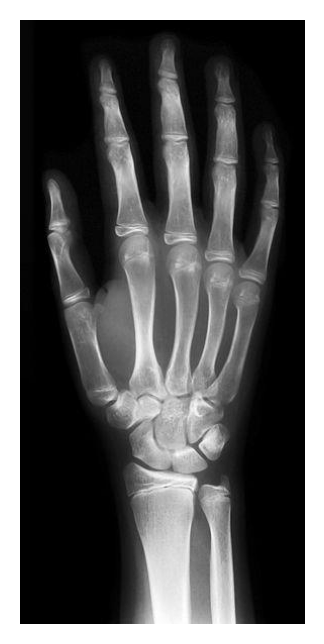

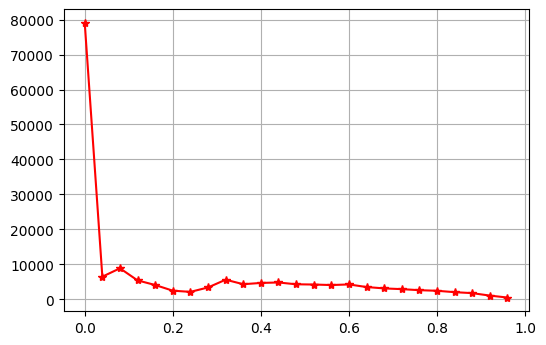

In [ ]:

def our_hist(image, bins):
  img_max = image.max()
  img_min = image.min()
  hist_range = img_max - img_min

  gap = hist_range/bins
  img_values , img_counts = np.unique(image.ravel(), return_counts=True)
  final_hist = np.zeros(bins)
  final_bins = []

  for i in range(bins):
    first_val = img_min + i*gap                   
    last_val = img_min + (i+1)*gap
    final_hist[i] = np.sum(img_counts[np.logical_and(img_values >= first_val, img_values < last_val)])
    final_bins.append(first_val)
  final_bins.append(last_val)
  final_bins = np.array(final_bins)
  return final_hist, final_bins

no_bins = 25
o_histogram, bins = our_hist(image, bins=no_bins)

print(bins)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=100)
plt.plot(bins[:-1], o_histogram, "r*-")
plt.grid(True)

plt.show()

In [ ]:
def histogram_equalization(image):
  
  hist_values, hist_index, hist_counts = np.unique(image.ravel(), return_counts=True, return_inverse=True)
  norm_values = np.cumsum(hist_counts).astype(np.float64)
  #norm_values/= norm_values[-1]

  norm_values-= norm_values[0]
  norm_values/= (norm_values[-1] - norm_values[0])
  norm_values*= 255

  norm_values= np.round(norm_values)
  print(norm_values)
  image_equalized = norm_values[hist_index]
  image_equalized = np.reshape(image_equalized, image.shape)
  return image_equalized
  

img = histogram_equalization(image)
our_eq_histogram, our_eq_bins = np.histogram(img.ravel(), bins=no_bins)

img_eq = exposure.equalize_hist(image)
eq_histogram, eq_bins = np.histogram(img_eq.ravel(), bins=no_bins)

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.plot(our_eq_bins[:-1],our_eq_histogram, "r*-")
plt.title("Moja funkcja")
plt.grid(True)
plt.subplot(1,2,2)
plt.title("Funkcja wbudowana")
plt.plot(eq_bins[:-1], eq_histogram, "r*-")
plt.grid(True)


In [ ]:
def histogram_matching(source, target): 
  source_values, source_bins, source_counts = np.unique(source, return_counts=True, return_inverse=True)
  target_values, target_counts = np.unique(target, return_counts=True)

  source_dist = np.cumsum(source_counts).astype(np.float64)
  target_dist = np.cumsum(target_counts).astype(np.float64)
  source_dist /= source_dist[-1]
  target_dist /= target_dist[-1]

  interp_values = np.interp(source_dist, target_dist, target_values)
 
  interp_values = interp_values[source_bins]
  source_matched = interp_values.reshape(source.shape)
  
  return source_matched

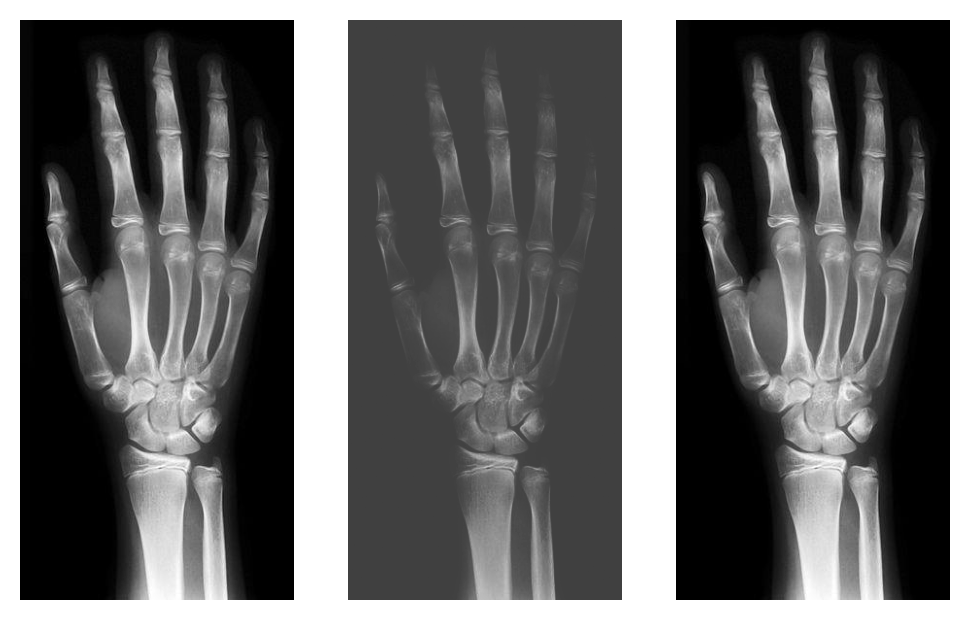

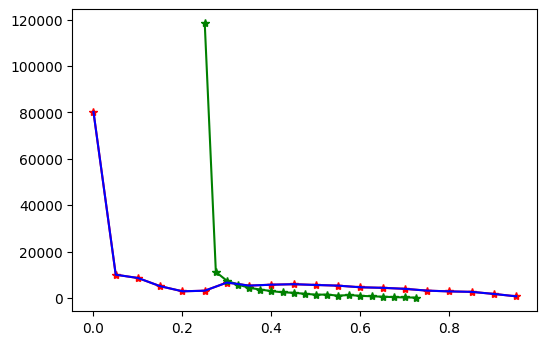

In [ ]:
new_image = 0.5*image**3 + 0.25

normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image))

matched_image = normalize(new_image)
matched_image = histogram_matching(new_image, image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

no_bins = 20
hist, bins = np.histogram(image, no_bins)
new_hist, new_bins = np.histogram(new_image, no_bins)
matched_hist, matched_bins = np.histogram(matched_image, no_bins)


plt.figure(dpi=100)
plt.plot(bins[:-1], hist, "r*-")
plt.plot(new_bins[:-1], new_hist, "g*-")
plt.plot(matched_bins[:-1], matched_hist, "b,-")

plt.show()